In [2]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

In [4]:
print(X,y)

[[-1.10689665e+00  4.22928095e-02]
 [ 9.56799641e-01  4.56750492e-01]
 [ 7.33516277e-01  5.84617437e-01]
 [ 1.11140659e+00 -3.09213987e-01]
 [ 2.09081764e-01  6.56679495e-04]
 [ 3.92205613e-01  3.20238629e-01]
 [-7.56185073e-01  8.29954942e-01]
 [ 1.50692319e+00 -1.11129319e-01]
 [ 2.04279588e+00 -3.79762883e-02]
 [ 1.44143707e-01  9.16713583e-01]
 [-3.70182653e-01  6.21450696e-01]
 [ 1.96525062e+00 -1.96615578e-01]
 [ 1.59638072e+00 -4.13640839e-01]
 [-8.63705975e-01  4.41056511e-01]
 [ 1.84475945e+00  2.10293824e-01]
 [ 1.97481657e+00 -3.74979774e-02]
 [ 6.79706368e-02  1.48663499e+00]
 [ 1.01435177e+00 -5.38028119e-01]
 [-1.14599170e+00  7.51822843e-01]
 [-2.94040701e-01  6.59140623e-01]
 [ 3.99794131e-01  5.33351479e-02]
 [ 9.19107031e-01  6.55677023e-01]
 [ 9.87384687e-01 -7.42238318e-01]
 [-7.72059219e-01  4.54272377e-01]
 [-3.25370862e-01  6.90553911e-01]
 [-4.77303848e-01  7.18915208e-01]
 [-7.34839977e-01  7.11904426e-01]
 [-4.42328219e-01  1.03783255e+00]
 [ 1.24996894e-01 -1

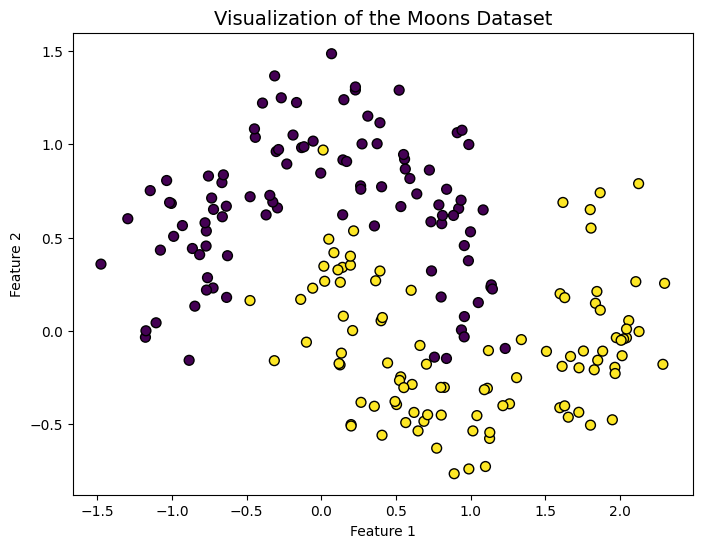

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')
plt.title("Visualization of the Moons Dataset", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
y = y.reshape(-1, 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
import numpy as np

class ANN:
    def __init__(self, n, hidden_layers, output_size):
  
        self.layers = [n] + hidden_layers + [output_size]
        self.weights = []
        self.biases = []
        
        for i in range(len(self.layers) - 1):
            fan_in = self.layers[i]
            weight = np.random.randn(self.layers[i], self.layers[i + 1]) * np.sqrt(2. / fan_in)
            self.weights.append(weight)
            self.biases.append(np.zeros((1, self.layers[i + 1])))

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(float)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward(self, X):
        activations = [X]
        for w, b in zip(self.weights[:-1], self.biases[:-1]):
            z = np.dot(activations[-1], w) + b
            a = self.relu(z)
            activations.append(a)
        
        z = np.dot(activations[-1], self.weights[-1]) + self.biases[-1]
        a = self.sigmoid(z)  # Output layer with sigmoid for binary classification
        activations.append(a)
        return activations

    def compute_loss(self, Y_pred, Y_true):
        m = Y_true.shape[0]
        loss = -np.sum(Y_true * np.log(Y_pred + 1e-8) + (1 - Y_true) * np.log(1 - Y_pred + 1e-8)) / m
        return loss

    def backward(self, activations, Y_true):
        gradients = {'dW': [], 'db': []}
        m = Y_true.shape[0]
        
        # Output layer
        dz = activations[-1] - Y_true
        dw = np.dot(activations[-2].T, dz) / m
        db = np.sum(dz, axis=0, keepdims=True) / m
        gradients['dW'].insert(0, dw)
        gradients['db'].insert(0, db)
        
        # Hidden layers
        for i in range(len(self.weights) - 2, -1, -1):
            dz = np.dot(dz, self.weights[i + 1].T) * self.relu_derivative(np.dot(activations[i], self.weights[i]) + self.biases[i])
            dw = np.dot(activations[i].T, dz) / m
            db = np.sum(dz, axis=0, keepdims=True) / m
            gradients['dW'].insert(0, dw)
            gradients['db'].insert(0, db)
        
        return gradients

    def update_parameters(self, gradients, lr):
        for i in range(len(self.weights)):
            self.weights[i] -= lr * gradients['dW'][i]
            self.biases[i] -= lr * gradients['db'][i]

    def train(self, X, Y, lr, epochs):
        for epoch in range(epochs):
            # Forward
            activations = self.forward(X)
            Y_pred = activations[-1]
            
            # Loss
            loss = self.compute_loss(Y_pred, Y)
            
            # Backward
            gradients = self.backward(activations, Y)
            
            # Update
            self.update_parameters(gradients, lr)
            
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        activations = self.forward(X)
        return (activations[-1] > 0.5).astype(int)

In [10]:
ann = ANN(n=2, hidden_layers=[], output_size=1)
ann.train(X_train, y_train, lr=0.1, epochs=300)

# Evaluate the ANN
y_pred = ann.predict(X_test)
accuracy = np.mean(y_pred == y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")

Epoch 0, Loss: 0.7974
Epoch 10, Loss: 0.6016
Epoch 20, Loss: 0.5006
Epoch 30, Loss: 0.4440
Epoch 40, Loss: 0.4092
Epoch 50, Loss: 0.3862
Epoch 60, Loss: 0.3702
Epoch 70, Loss: 0.3584
Epoch 80, Loss: 0.3496
Epoch 90, Loss: 0.3428
Epoch 100, Loss: 0.3374
Epoch 110, Loss: 0.3330
Epoch 120, Loss: 0.3295
Epoch 130, Loss: 0.3266
Epoch 140, Loss: 0.3241
Epoch 150, Loss: 0.3221
Epoch 160, Loss: 0.3203
Epoch 170, Loss: 0.3188
Epoch 180, Loss: 0.3176
Epoch 190, Loss: 0.3165
Epoch 200, Loss: 0.3155
Epoch 210, Loss: 0.3147
Epoch 220, Loss: 0.3139
Epoch 230, Loss: 0.3133
Epoch 240, Loss: 0.3127
Epoch 250, Loss: 0.3122
Epoch 260, Loss: 0.3118
Epoch 270, Loss: 0.3114
Epoch 280, Loss: 0.3110
Epoch 290, Loss: 0.3107
Accuracy: 85.00%


In [11]:
ann = ANN(n=2, hidden_layers=[4], output_size=1)
ann.train(X_train, y_train, lr=0.1, epochs=300)

# Evaluate the ANN
y_pred = ann.predict(X_test)
accuracy = np.mean(y_pred == y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")


Epoch 0, Loss: 0.6839
Epoch 10, Loss: 0.5848
Epoch 20, Loss: 0.5259
Epoch 30, Loss: 0.4831
Epoch 40, Loss: 0.4495
Epoch 50, Loss: 0.4229
Epoch 60, Loss: 0.4020
Epoch 70, Loss: 0.3855
Epoch 80, Loss: 0.3727
Epoch 90, Loss: 0.3627
Epoch 100, Loss: 0.3549
Epoch 110, Loss: 0.3484
Epoch 120, Loss: 0.3430
Epoch 130, Loss: 0.3385
Epoch 140, Loss: 0.3345
Epoch 150, Loss: 0.3312
Epoch 160, Loss: 0.3284
Epoch 170, Loss: 0.3259
Epoch 180, Loss: 0.3235
Epoch 190, Loss: 0.3214
Epoch 200, Loss: 0.3194
Epoch 210, Loss: 0.3172
Epoch 220, Loss: 0.3150
Epoch 230, Loss: 0.3130
Epoch 240, Loss: 0.3110
Epoch 250, Loss: 0.3092
Epoch 260, Loss: 0.3075
Epoch 270, Loss: 0.3059
Epoch 280, Loss: 0.3043
Epoch 290, Loss: 0.3028
Accuracy: 85.00%


In [12]:
ann = ANN(n=2, hidden_layers=[12,8], output_size=1)
ann.train(X_train, y_train, lr=0.1, epochs=300)

# Evaluate the ANN
y_pred = ann.predict(X_test)
accuracy = np.mean(y_pred == y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")

Epoch 0, Loss: 0.6686
Epoch 10, Loss: 0.5236
Epoch 20, Loss: 0.4542
Epoch 30, Loss: 0.4140
Epoch 40, Loss: 0.3894
Epoch 50, Loss: 0.3741
Epoch 60, Loss: 0.3621
Epoch 70, Loss: 0.3525
Epoch 80, Loss: 0.3442
Epoch 90, Loss: 0.3367
Epoch 100, Loss: 0.3297
Epoch 110, Loss: 0.3227
Epoch 120, Loss: 0.3162
Epoch 130, Loss: 0.3093
Epoch 140, Loss: 0.3020
Epoch 150, Loss: 0.2941
Epoch 160, Loss: 0.2868
Epoch 170, Loss: 0.2797
Epoch 180, Loss: 0.2726
Epoch 190, Loss: 0.2652
Epoch 200, Loss: 0.2577
Epoch 210, Loss: 0.2501
Epoch 220, Loss: 0.2423
Epoch 230, Loss: 0.2344
Epoch 240, Loss: 0.2264
Epoch 250, Loss: 0.2187
Epoch 260, Loss: 0.2110
Epoch 270, Loss: 0.2034
Epoch 280, Loss: 0.1960
Epoch 290, Loss: 0.1888
Accuracy: 95.00%


In [13]:
ann = ANN(n=2, hidden_layers=[30,20,10], output_size=1)
ann.train(X_train, y_train, lr=0.1, epochs=300)

# Evaluate the ANN
y_pred = ann.predict(X_test)
accuracy = np.mean(y_pred == y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")

Epoch 0, Loss: 0.8321
Epoch 10, Loss: 0.3251
Epoch 20, Loss: 0.2935
Epoch 30, Loss: 0.2828
Epoch 40, Loss: 0.2755
Epoch 50, Loss: 0.2692
Epoch 60, Loss: 0.2640
Epoch 70, Loss: 0.2592
Epoch 80, Loss: 0.2549
Epoch 90, Loss: 0.2506
Epoch 100, Loss: 0.2463
Epoch 110, Loss: 0.2418
Epoch 120, Loss: 0.2374
Epoch 130, Loss: 0.2330
Epoch 140, Loss: 0.2284
Epoch 150, Loss: 0.2238
Epoch 160, Loss: 0.2193
Epoch 170, Loss: 0.2145
Epoch 180, Loss: 0.2096
Epoch 190, Loss: 0.2046
Epoch 200, Loss: 0.1993
Epoch 210, Loss: 0.1932
Epoch 220, Loss: 0.1871
Epoch 230, Loss: 0.1814
Epoch 240, Loss: 0.1757
Epoch 250, Loss: 0.1700
Epoch 260, Loss: 0.1643
Epoch 270, Loss: 0.1588
Epoch 280, Loss: 0.1534
Epoch 290, Loss: 0.1480
Accuracy: 90.00%


In [14]:
ann = ANN(n=2, hidden_layers=[50,25,12,6], output_size=1)
ann.train(X_train, y_train, lr=0.1, epochs=300)

# Evaluate the ANN
y_pred = ann.predict(X_test)
accuracy = np.mean(y_pred == y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")

Epoch 0, Loss: 0.6703
Epoch 10, Loss: 0.4550
Epoch 20, Loss: 0.4027
Epoch 30, Loss: 0.3323
Epoch 40, Loss: 0.2765
Epoch 50, Loss: 0.2574
Epoch 60, Loss: 0.2422
Epoch 70, Loss: 0.2317
Epoch 80, Loss: 0.2234
Epoch 90, Loss: 0.2171
Epoch 100, Loss: 0.2117
Epoch 110, Loss: 0.2069
Epoch 120, Loss: 0.2024
Epoch 130, Loss: 0.1982
Epoch 140, Loss: 0.1945
Epoch 150, Loss: 0.1908
Epoch 160, Loss: 0.1875
Epoch 170, Loss: 0.1840
Epoch 180, Loss: 0.1805
Epoch 190, Loss: 0.1773
Epoch 200, Loss: 0.1742
Epoch 210, Loss: 0.1708
Epoch 220, Loss: 0.1674
Epoch 230, Loss: 0.1638
Epoch 240, Loss: 0.1590
Epoch 250, Loss: 0.1544
Epoch 260, Loss: 0.1499
Epoch 270, Loss: 0.1453
Epoch 280, Loss: 0.1406
Epoch 290, Loss: 0.1344
Accuracy: 90.00%


In [15]:
def plot_decision_boundary(model, X, y, resolution=0.01):
    """
    Plots the decision boundary of a trained ANN model.
    
    Parameters:
    - model: Trained ANN model
    - X: Feature matrix (2D)
    - y: Labels
    - resolution: Resolution of the grid for plotting
    """
    # Create a grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    # Flatten the grid and make predictions
    grid = np.c_[xx.ravel(), yy.ravel()]  # Shape: (n_points, 2)
    predictions = model.predict(grid)     # Shape: (n_points,)
    predictions = predictions.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, predictions, alpha=0.7, cmap=plt.cm.Paired)
    
    # Plot original data points
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolor='k', cmap=plt.cm.Paired)
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

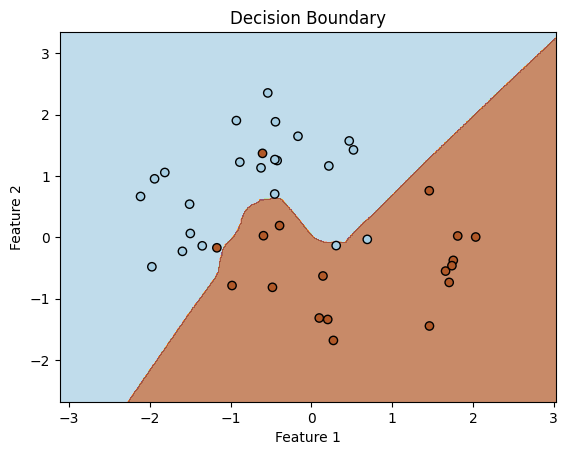

In [16]:
 plot_decision_boundary(ann, X_test, y_test)